In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
#Definicion de la funcion de k_means 
class KMeans:
    def __init__(self, n_clusters= 2, max_iter= 300, tol= 1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels_= None

    #Creacion de la funcion Ramdon choice
    def fit(self, x):
        idx = np.random.choice(x.shape[0], self.n_clusters, replace= False) 
        self.centroids = x[idx, :]

        #Distancia entre centroides
        for _ in range(self.max_iter):
            distances= np.linalg.norm(x[:, np.newaxis] - self.centroids, axis= 2)
            #Escalar de distancia
            self.labels_= np.argmin(distances, axis= 1)
            new_centroids = np.array([x[self.labels_== i].mean(axis=0) for i in range(self.n_clusters)])
            
            #Ajustar el centroide
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def predict(self, x):
        distances= np.linalg.norm(x[:, np.newaxis] - self.centroids, axis= 2)
        return np.argmin(distances, axis= 1)

In [73]:
#Generar un dataset ficticion
x, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(x)
y_pred= Kmeans.predict(x)

In [74]:
#Reetiquetar cluster
def relabel_cluster(true_label, predicted_label):
    cm = confusion_matrix(true_label, predicted_label)
    relabeling = np.argmax(cm, axis=1)
    new_predicted_label= np.array([relabeling[label] for label in predicted_label])
    return new_predicted_label

In [75]:
#Reetiquetar predicciones
y_pred= relabel_cluster(y_true, y_pred)
report= classification_report(y_true, y_pred)
print(report )   


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



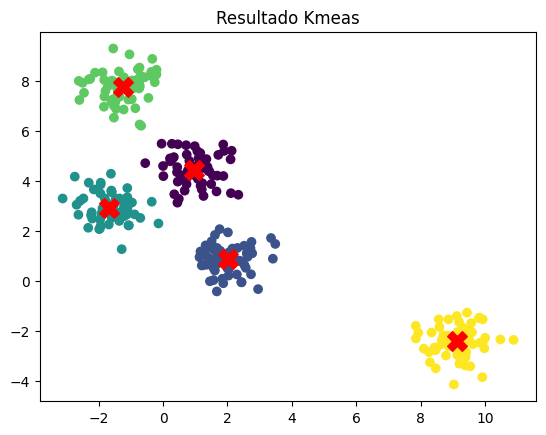

In [76]:
#Visualizacion grafica
plt.scatter(x[:,0], x[:,1], c= y_pred , cmap= 'viridis')
plt.scatter(Kmeans.centroids[:,0], Kmeans.centroids[:,1], s= 200, c= 'red', marker='X')
plt.title('Resultado Kmeas')
plt.show()